# Web Scraping - Naukri job Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# libraries for web scraping
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [39]:
URL = 'https://www.naukri.com/data-science-jobs'

In [40]:
page = requests.get(URL)

In [41]:
# check the status code 

page.status_code

# A status code of 200 means you are allowed to scrap the data

200

In [42]:
page

<Response [200]>

In [6]:
# get the html code from the URL

pagecontent = page.text
print(pagecontent)

<!DOCTYPE html> <html lang="en"> <head> <meta http-equiv="X-UA-Compatible" content="IE=Edge" /> <meta name="viewport" content="width=device-width,initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" /> <link rel="dns-prefetch preconnect" href="//static.naukimg.com"> <link rel="dns-prefetch preconnect" href="//img.naukimg.com"> <link rel="dns-prefetch preconnect" href="//logs.naukri.com"> <link rel="dns-prefetch preconnect" href="//lg.naukri.com"> <link rel="dns-prefetch" href="https://www.googletagmanager.com" /> <base href="//www.naukri.com" /> <link rel="manifest" href="./manifest.json"> <link rel="preload" as="style" href="//static.naukimg.com/s/7/109/c/main.d72fc547.min.css"/> <link rel="preload" as="script" href="//static.naukimg.com/s/7/109/j/main.c8d687c9.min.js"> <script>
        window.ipAddress = "www.naukri.com";
        window.DEBUG = true;
        window.appId = 135;
                    var isCrawler = false;
                            var ucBrowser 

In [7]:
soup = BeautifulSoup(pagecontent)
print(soup)

<!DOCTYPE html>
<html lang="en"> <head> <meta content="IE=Edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width,initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/> <link href="//static.naukimg.com" rel="dns-prefetch preconnect"/> <link href="//img.naukimg.com" rel="dns-prefetch preconnect"/> <link href="//logs.naukri.com" rel="dns-prefetch preconnect"/> <link href="//lg.naukri.com" rel="dns-prefetch preconnect"/> <link href="https://www.googletagmanager.com" rel="dns-prefetch"/> <base href="//www.naukri.com"/> <link href="./manifest.json" rel="manifest"/> <link as="style" href="//static.naukimg.com/s/7/109/c/main.d72fc547.min.css" rel="preload"/> <link as="script" href="//static.naukimg.com/s/7/109/j/main.c8d687c9.min.js" rel="preload"/> <script>
        window.ipAddress = "www.naukri.com";
        window.DEBUG = true;
        window.appId = 135;
                    var isCrawler = false;
                            var ucBrowse

In [14]:
driver = webdriver.Chrome(r'C:\Chrome Driver\chromedriver_win32\chromedriver.exe')
driver.get(URL)

time.sleep(3)

soup = BeautifulSoup(driver.page_source, 'html5lib')
print(soup.prettify())

driver.close()

<html lang="en">
 <head>
  <title>
   Data Science Jobs, 14479 Data Science Openings - Naukri.com
  </title>
  <meta content="Apply To 14479 Data Science Jobs On Naukri.com, India's No.1 Job Portal. Explore Data Science Openings In Your Desired Locations Now!" name="description"/>
  <link href="android-app://naukriApp.appModules.login/https/www.naukri.com/data-science-jobs" rel="alternate"/>
  <link href="https://www.naukri.com/data-science-jobs" rel="canonical"/>
  <meta content="jobsearch" name="atdlayout"/>
  <meta content="ALL" name="robots"/>
  <meta content="Jobs &amp; Career: Job Search, Apply Jobs, Post Jobs" name="classification"/>
  <meta content="no-cache" name="pragma"/>
  <meta content="general" name="rating"/>
  <meta content="1 day" name="revisit-after"/>
  <meta content="GLOBAL" name="distribution"/>
  <meta content="document" name="resource-type"/>
  <meta content="www.naukri.com" name="author"/>
  <meta content="EN" name="content-language"/>
  <meta content="171330469

In [16]:
jobtitle = []
joburl = []
company = []
companyrating = []
experience = []
salary = []
location = []
jobdesc = []
skills = []
daysposted = []
pgno = []


for x in range(1,6):
    start_time = time.time()
    url = 'https://www.naukri.com/data-science-jobs-{}'.format(x)
    
    driver = webdriver.Chrome(r'C:\Chrome Driver\chromedriver_win32\chromedriver.exe')
    driver.get(URL)
    time.sleep(3)
    soup = BeautifulSoup(driver.page_source, 'html5lib')
    driver.close()
    
    job_articles = soup.findAll('article', attrs={'class':'jobTuple bgWhite br4 mb-8'})
    for job in job_articles:    
        # job title and job url
        i = job.find('a', attrs={'class':'title fw500 ellipsis'})       
        if i is None:
            jobtitle.append(np.NaN)
        else:
            jobtitle.append(i.text)
            
        # url
        if i is None:
            joburl.append(np.NaN)
        else:
            joburl.append(i.get('href'))
        

         # company name
        j = job.find('a', attrs={'class':'subTitle ellipsis fleft'})    
        if j is None:
            company.append(np.NaN)
        else:
            company.append(j.text)

        # company rating
        k = job.find('span', attrs={'class':'starRating fleft dot'})    
        if k is None:
            companyrating.append(np.NaN)
        else:
            companyrating.append(k.text)

        # Experience
        l = job.find('span', attrs={'class':'ellipsis fleft fs12 lh16'})    
        if l is None:
            experience.append(np.NaN)
        else:
            experience.append(l.text)

        # Salary
        m = job.find('li', attrs={'class':'fleft grey-text br2 placeHolderLi salary'})    
        if m is None:
            salary.append(np.NaN)
        else:
            salary.append(m.text)

        # Job location
        n = job.find('li', attrs={'class':'fleft grey-text br2 placeHolderLi location'})    
        if n is None:
            location.append(np.NaN)
        else:
            location.append(n.text)

        # Job Description
        o = job.find('div', attrs={'class':'job-description fs12 grey-text'})    
        if o is None:
            jobdesc.append(np.NaN)
        else:
            jobdesc.append(o.text)

        # Job skills
        skillset = []
        p = job.find('ul', attrs={'class':'tags has-description'})    
        for li in p:
            skillset.append(li.text)
        skills.append(skillset)

        # Job posted days
        q = job.find('div', attrs={'class':'type br2 fleft green'})    
        if q is None:
            q = job.find('div', attrs={'class':'type br2 fleft grey'})
            if q is None:
                daysposted.append(np.NaN)
            else:
                daysposted.append(q.text)
        else:
            daysposted.append(q.text)

        pgno.append(x)
    
    end_time = time.time()
    print('Page {} completed in {} seconds'.format(x,end_time-start_time))


Page 1 completed in 33.088496923446655 seconds
Page 2 completed in 32.8172070980072 seconds
Page 3 completed in 41.06958246231079 seconds
Page 4 completed in 33.342495918273926 seconds
Page 5 completed in 34.04869866371155 seconds


In [17]:
# combine multiple equal length lists into  a data frame

dsjobs_df = pd.DataFrame({'PageNo':pgno,'Jobtitle':jobtitle,'JobURL':joburl, 'Company':company, 'Companyrating': companyrating, 'Experience':experience,
             'Salary':salary, 'Location': location, 'JobDesc': jobdesc,'Skills':skills, 'DaysPosted':daysposted})


In [18]:
dsjobs_df.shape

(100, 11)

In [19]:
dsjobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PageNo         100 non-null    int64 
 1   Jobtitle       100 non-null    object
 2   JobURL         100 non-null    object
 3   Company        100 non-null    object
 4   Companyrating  95 non-null     object
 5   Experience     100 non-null    object
 6   Salary         100 non-null    object
 7   Location       100 non-null    object
 8   JobDesc        100 non-null    object
 9   Skills         100 non-null    object
 10  DaysPosted     100 non-null    object
dtypes: int64(1), object(10)
memory usage: 8.7+ KB


In [20]:
dsjobs_df.to_excel(r'C:\Data\Naukri_DS_jobs.xlsx',index=False)

In [21]:
dsjobs_df.Location.value_counts()

Bangalore/Bengaluru                        45
Hyderabad/Secunderabad                     15
India                                      15
Bengaluru                                  10
Hyderabad/Secunderabad(Kondapur)            8
Bangalore/Bengaluru, Mumbai (All Areas)     5
Pune                                        2
Name: Location, dtype: int64

In [22]:
dsjobs_df[dsjobs_df.Location.str.contains('Hyderabad')]

,PageNo,Jobtitle,JobURL,Company,Companyrating,Experience,Salary,Location,JobDesc,Skills,DaysPosted
1,1,Data Science Engineer (Smart MFG & AI),https://www.naukri.com/job-listings-data-scien...,Micron Semiconductor Asia Pte Ltd,5.0,0-5 Yrs,Not disclosed,Hyderabad/Secunderabad,A degree or certification in Data science wil...,"[Data Science, R, Artificial Intelligence, Adv...",6 Days Ago
2,1,Data Science,https://www.naukri.com/job-listings-data-scien...,Luxoft,4.5,3-6 Yrs,Not disclosed,Hyderabad/Secunderabad,Project Description Required Experience (Indi...,"[Data analysis, NoSQL, Linux, MySQL, Machine l...",11 Days Ago
15,1,Immediate Job Opening For Data Science Manager...,https://www.naukri.com/job-listings-immediate-...,GlobalData,3.6,10-15 Yrs,Not disclosed,Hyderabad/Secunderabad(Kondapur),"Experience with data gathering, data quality,...","[product development life cycle, Caffe2, MS SQ...",1 Day Ago
16,1,Job Opening For Data Science Module Lead posit...,https://www.naukri.com/job-listings-opening-fo...,GlobalData,3.6,4-8 Yrs,Not disclosed,Hyderabad/Secunderabad(Kondapur),"Hello, Immediate Job Opening for Data Science...","[IT Skills, Python, Software Development, Data...",12 Days Ago
17,1,Associate Director - Data Science,https://www.naukri.com/job-listings-associate-...,Parexel International India Pvt. Ltd.,4.0,5-10 Yrs,Not disclosed,Hyderabad/Secunderabad,Programming expertise or certification in com...,[Data Science],7 Days Ago
21,2,Data Science Engineer (Smart MFG & AI),https://www.naukri.com/job-listings-data-scien...,Micron Semiconductor Asia Pte Ltd,5.0,0-5 Yrs,Not disclosed,Hyderabad/Secunderabad,A degree or certification in Data science wil...,"[Data Science, R, Artificial Intelligence, Adv...",6 Days Ago
22,2,Data Science,https://www.naukri.com/job-listings-data-scien...,Luxoft,4.5,3-6 Yrs,Not disclosed,Hyderabad/Secunderabad,Project Description Required Experience (Indi...,"[Data analysis, NoSQL, Linux, MySQL, Machine l...",11 Days Ago
35,2,Immediate Job Opening For Data Science Manager...,https://www.naukri.com/job-listings-immediate-...,GlobalData,3.6,10-15 Yrs,Not disclosed,Hyderabad/Secunderabad(Kondapur),"Experience with data gathering, data quality,...","[product development life cycle, Caffe2, MS SQ...",1 Day Ago
36,2,Job Opening For Data Science Module Lead posit...,https://www.naukri.com/job-listings-opening-fo...,GlobalData,3.6,4-8 Yrs,Not disclosed,Hyderabad/Secunderabad(Kondapur),"Hello, Immediate Job Opening for Data Science...","[IT Skills, Python, Software Development, Data...",12 Days Ago
37,2,Associate Director - Data Science,https://www.naukri.com/job-listings-associate-...,Parexel International India Pvt. Ltd.,4.0,5-10 Yrs,Not disclosed,Hyderabad/Secunderabad,Programming expertise or certification in com...,[Data Science],7 Days Ago


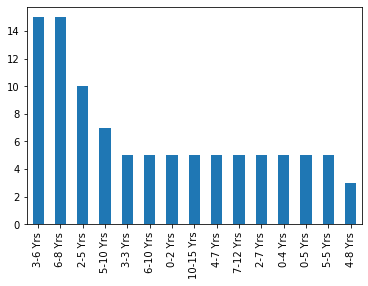

In [23]:
dsjobs_df.Experience.value_counts().plot(kind='bar');

In [24]:
dsjobs_df.Skills[0]
','.join(dsjobs_df.Skills[0])
','.join(dsjobs_df.Skills[1])
','.join(dsjobs_df.Skills[2])
','.join(dsjobs_df.Skills[3])

['HTML5',
 'Spotfire',
 'Tableau',
 'Python',
 'SPSS',
 'machine learning',
 'R',
 'Qlikview']

'HTML5,Spotfire,Tableau,Python,SPSS,machine learning,R,Qlikview'

'Data Science,R,Artificial Intelligence,Advanced Analytics,Data Analysis,Data Mining,SQL Server,Tableau'

'Data analysis,NoSQL,Linux,MySQL,Machine learning,linear regression,MongoDB,Natural language processing'

'Machine learning,Python,modelling,Analytics,R,IT Skills,Artificial Intelligence,Data Science'

In [25]:
dsjobs_df.Skills.apply(lambda x:','.join(x))

0     HTML5,Spotfire,Tableau,Python,SPSS,machine lea...
1     Data Science,R,Artificial Intelligence,Advance...
2     Data analysis,NoSQL,Linux,MySQL,Machine learni...
3     Machine learning,Python,modelling,Analytics,R,...
4     Data Science,NLP,Power BI,Data Scientist,Full ...
                            ...                        
95    product development life cycle,Caffe2,MS SQL,N...
96    IT Skills,Python,Software Development,Data Sci...
97                                         Data Science
98    Management Consulting,Requirement Gathering,Bu...
99    Business process,Data analysis,Statistical mod...
Name: Skills, Length: 100, dtype: object

In [28]:
dsjobs_df['Skills_new'] = dsjobs_df.Skills.apply(lambda x:','.join(x))

In [27]:
dsjobs_df.Skills_new

0     HTML5,Spotfire,Tableau,Python,SPSS,machine lea...
1     Data Science,R,Artificial Intelligence,Advance...
2     Data analysis,NoSQL,Linux,MySQL,Machine learni...
3     Machine learning,Python,modelling,Analytics,R,...
4     Data Science,NLP,Power BI,Data Scientist,Full ...
                            ...                        
95    product development life cycle,Caffe2,MS SQL,N...
96    IT Skills,Python,Software Development,Data Sci...
97                                         Data Science
98    Management Consulting,Requirement Gathering,Bu...
99    Business process,Data analysis,Statistical mod...
Name: Skills_new, Length: 100, dtype: object

In [29]:
dsjobs_df.Skills_new[0]+','+dsjobs_df.Skills_new[1]

'HTML5,Spotfire,Tableau,Python,SPSS,machine learning,R,Qlikview,Data Science,R,Artificial Intelligence,Advanced Analytics,Data Analysis,Data Mining,SQL Server,Tableau'

In [30]:
z = []
for x in dsjobs_df.Skills_new:
    z.append(x)

In [31]:
len(z)

100

In [32]:
skills_all = ','.join(z).split(',')

In [33]:
type(skills_all)

list

In [34]:
len(skills_all)

690

In [35]:
skills_all_uppercase = list(map(lambda x:x.upper(), skills_all))

In [36]:
pd.Series(skills_all_uppercase).value_counts().iloc[0:14]

PYTHON                  55
MACHINE LEARNING        53
DATA SCIENCE            50
IT SKILLS               28
DATA ANALYSIS           22
JAVA                    20
TABLEAU                 20
TESTING                 20
SOFTWARE DEVELOPMENT    18
R                       15
SQL                     15
DEEP LEARNING           10
PROJECT MANAGEMENT      10
QLIKVIEW                10
dtype: int64

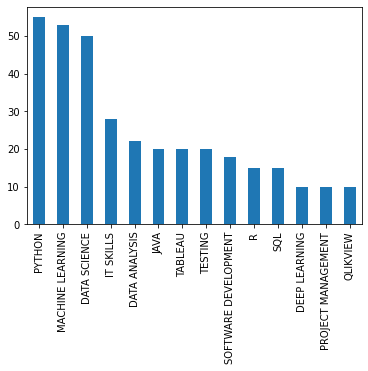

In [37]:
pd.Series(skills_all_uppercase).value_counts().iloc[0:14].plot(kind='bar');

In [38]:
time.time() # Return the current time in seconds since the Epoch.

1619589311.723986